Bối cảnh: Giả sử bạn đang đứng trước một dãy gồm
𝐾 máy đánh bạc (bandit). Mỗi máy có một xác suất chiến thắng khác nhau nhưng không được biết trước. Nhiệm vụ của bạn là chọn một máy để kéo tay gạt sao cho tổng phần thưởng nhận được là lớn nhất.

Mục tiêu:Tối ưu hóa chiến lược chọn máy qua nhiều lượt thử để tối đa hóa phần thưởng kỳ vọng.

Thách thức:Có sự đánh đổi giữa hai yếu tố:

**Thám hiểm (exploration):** Thử các máy mới để khám phá xác suất phần thưởng của chúng.

**Khai thác (exploitation):** Chọn máy có vẻ mang lại phần thưởng cao nhất dựa trên thông tin đã biết.

Để đánh giá hiệu quả của các phương pháp Học Tăng cường (Reinforcement Learning - RL) trên bài toán K-bandits, chúng ta sẽ sử dụng bài toán 10-armed bandit.

Cụ thể, 2000 bài toán bandit với 10 cánh tay được tạo ngẫu nhiên. Trong mỗi bài toán, giá trị hành động Q*(a) (với a là các cánh tay từ 1 đến 10) được chọn ngẫu nhiên từ phân phối chuẩn (Gaussian) với trung bình bằng 0 và phương sai bằng 1.

Phương pháp học sẽ chọn một hành động At tại mỗi bước thời gian t. Phần thưởng thực tế Rt của hành động này được lấy từ phân phối chuẩn với trung bình là Q*(At) và phương sai bằng 1.

Hiệu suất và hành vi của phương pháp học được đo lường qua 100 bước thời gian để đánh giá khả năng cải thiện nhờ kinh nghiệm trên một bài toán bandit. Quá trình này được lặp lại 2000 lần, mỗi lần với một bài toán bandit khác nhau, nhằm cung cấp đánh giá toàn diện về hành vi của thuật toán.

# **Mô hình hóa **

**Môi trường**: Gồm 10 băng tay (bandit) với 10 hành động khác nhau.

**Tác nhân**: Có khả năng chọn giữa k hành động khác nhau.

**Mối quan hệ giữa tác nhân và môi trường:**


*   Mỗi lượt, tác nhân chọn một hành động A_t từ tập hành động.
*   Môi trường trả lại cho tác nhân phần thưởng R_t dựa trên hành động đã chọn.


**Phần thưởng:**cho từng hành động tuân theo phân phối chuẩn.

**Mục tiêu:** Tối đa hóa phần thưởng nhận được cho tác nhân.

In [ ]:
#importing libraries

# %matplotlib inline: Được sử dụng trong môi trường Jupyter Notebook để hiển thị biểu đồ ngay trong notebook
%matplotlib inline

# Importing numpy for numerical computations and handling arrays
import numpy as np

# Importing matplotlib.pyplot for creating static, animated, and interactive visualizations
import matplotlib.pyplot as plt

# Importing time for timing functions and adding delays in code execution
import time

# Môi trường và Tác nhân

In [ ]:
import numpy as np


class BanditEnvironment:
    """
    Lớp mô phỏng môi trường Bandit với phần thưởng ngẫu nhiên theo phân phối Gaussian.
    """

    def __init__(self, n_expectation, n_variance):
        """
        Khởi tạo môi trường Bandit.

        Args:
            n_expectation (list[float]): Danh sách kỳ vọng (mean) cho các hành động.
            n_variance (list[float]): Danh sách phương sai (variance) cho các hành động.
        """
        # Danh sách kỳ vọng cho từng hành động
        self.n_expectation = n_expectation
        # Danh sách phương sai cho từng hành động
        self.n_variance = n_variance
        # Bước thời gian hiện tại
        self.time_step = 0
        # Phần thưởng thật (true rewards) được khởi tạo ngẫu nhiên
        self.true_rewards = [
            np.random.normal(loc=mean, scale=var)
            for mean, var in zip(self.n_expectation, self.n_variance)
        ]

    def get_reward(self, action):
        """
        Nhận phần thưởng khi chọn một hành động.

        Args:
            action (int): Hành động được chọn (chỉ số của hành động).

        Returns:
            float: Phần thưởng nhận được.
        """
        # Tăng bước thời gian
        self.time_step += 1
        # Trả về phần thưởng ngẫu nhiên dựa trên hành động được chọn
        return np.random.normal(
            loc=self.true_rewards[action],
            scale=self.n_variance[action]
        )



In [ ]:
class HumanAgent:
    def __init__(self, n_bandit):
        self.n_bandit = n_bandit

    def get_action(self):
        while True:
            # Tạo thông báo đầu vào
            user_input = input(f"Nhập số thứ tự của hành động bạn muốn chọn (0-{self.n_bandit - 1}): ")
            try:
                action = int(user_input)
                if 0 <= action < self.n_bandit:
                    return action
                else:
                    print("Hành động không hợp lệ! Vui lòng chọn lại.")
            except ValueError:
                print("Vui lòng nhập một số hợp lệ.")

    def update_value(self, action, reward):
        # Human agent không cần cập nhật
        pass

    def reset(self):
        pass

In [ ]:
def test(env, agent, num_trials):
  for i in range(num_trials):
        try:
            action = agent.get_action()
            reward = env.get_reward(action)
            agent.update_value(action, reward)

            print(f"Lần lặp {i + 1}: Tác nhân chọn hành động {action}, Phần thưởng: {reward:.2f}")

        except ValueError:
            print("Vui lòng nhập một số nguyên hợp lệ.")



if __name__ == "__main__":
    # Nhập số lượng bandit
    n_bandit = int(input("Mời nhập số lượng bandit: "))
    print(f"Bắt đầu với bài toán {n_bandit}:")

    # Nhập số vòng lặp
    num_trials = int(input("Mời nhập số lần thử: "))

    # Tạo các kỳ vọng và phương sai ngẫu nhiên
    expectation = [np.random.normal(0, 1) for _ in range(n_bandit)]
    variance = [1]*n_bandit

    # Khởi tạo môi trường và agent
    env = BanditEnvironment(expectation, variance)
    agent = HumanAgent(n_bandit)

    # Thực hiện kiểm thử với số lần thử đã chọn
    test(env, agent, num_trials)

Mời nhập số lượng bandit: 10
Bắt đầu với bài toán 10:
Mời nhập số lần thử: 4
Nhập số thứ tự của hành động bạn muốn chọn (0-9): 2
Lần lặp 1: Tác nhân chọn hành động 2, Phần thưởng: 0.11
Nhập số thứ tự của hành động bạn muốn chọn (0-9): 2
Lần lặp 2: Tác nhân chọn hành động 2, Phần thưởng: -3.34
Nhập số thứ tự của hành động bạn muốn chọn (0-9): 2
Lần lặp 3: Tác nhân chọn hành động 2, Phần thưởng: -0.87
Nhập số thứ tự của hành động bạn muốn chọn (0-9): 2
Lần lặp 4: Tác nhân chọn hành động 2, Phần thưởng: -1.53


In [ ]:
# Hằng số
NUM_STEPS = 100             # Số lần chọn tay gạt mà agent thực hiện
N_BANDITS = 10                  # Số lượng tay gạt
NUM_RUNS = 2000     # Số lượt khởi tạo (thử nghiệm)
agent=None

In [ ]:


def run(agent, n_bandits=N_BANDITS, NUM_STEPS=NUM_STEPS, NUM_RUNS=NUM_RUNS):
    total_averages = np.zeros(NUM_STEPS)  # Trung bình phần thưởng theo mỗi bước qua các lần chạy
    total_best_rewards = np.zeros(NUM_STEPS)  # Trung bình phần thưởng tốt nhất theo mỗi bước qua các lần chạy

    for run in range(NUM_RUNS):
        # Khởi tạo các tham số môi trường
        expectation = [np.random.normal(0, 2) for _ in range(n_bandits)]  # Kỳ vọng của mỗi tay gạt
        variance = [1]*n_bandits  # Phương sai của mỗi tay gạt
        env = BanditEnvironment(expectation, variance)  # Khởi tạo môi trường Bandit với kỳ vọng và phương sai

        #Khởi tạo là Agent
        agent.reset()
        # Danh sách lưu trữ các giá trị trung bình cho mỗi lần chạy
        scores = []  # Khởi tạo danh sách điểm số
        averages = np.zeros(NUM_STEPS)  # Lưu giá trị trung bình phần thưởng
        best_rewards = np.zeros(NUM_STEPS)  # Lưu phần thưởng tốt nhất tại mỗi bước

        # Vòng lặp qua các bước trong thử nghiệm
        for step in range(NUM_STEPS):
            action = agent.get_action()  # Lấy hành động từ agent
            reward = env.get_reward(action)  # Lấy phần thưởng từ môi trường
            agent.update_value(action, reward)  # Cập nhật giá trị hành động

            scores.append(reward)  # Lưu phần thưởng nhận được
            averages[step] = np.mean(scores)  # Cập nhật giá trị trung bình của phần thưởng
            best_rewards[step] = np.max(env.true_rewards)  # Lưu phần thưởng tốt nhất cho mỗi bước

        # Cộng dồn vào tổng trung bình qua các lần chạy
        total_averages += averages
        total_best_rewards += best_rewards

    # Chia tổng cho số lần chạy để lấy trung bình
    total_averages /= NUM_RUNS
    total_best_rewards /= NUM_RUNS

    return total_averages, total_best_rewards



In [ ]:
import numpy as np

def runs(agents, n_bandits=N_BANDITS, num_steps=NUM_STEPS, num_runs=NUM_RUNS):
    """Chạy nhiều agent qua nhiều lần thử nghiệm và tính trung bình phần thưởng."""
    total_averages = np.zeros((len(agents), num_steps))  # Trung bình phần thưởng theo mỗi bước qua các lần chạy

    for run in range(num_runs):
        # Khởi tạo các tham số môi trường
        expectation = [np.random.normal(0,2) for _ in range(n_bandits)]  # Kỳ vọng của mỗi tay gạt
        variance = [1]*n_bandits
        env = BanditEnvironment(expectation, variance)  # Khởi tạo môi trường Bandit

        # Lặp qua từng agent
        for i, agent in enumerate(agents):
            # Khởi tạo lại agent
            agent.reset()

            # Danh sách lưu trữ các giá trị trung bình cho mỗi lần chạy
            scores = []  # Khởi tạo danh sách điểm số
            averages = np.zeros(num_steps)  # Lưu giá trị trung bình phần thưởng

            # Vòng lặp qua các bước trong thử nghiệm
            for step in range(num_steps):
                action = agent.get_action()  # Lấy hành động từ agent
                reward = env.get_reward(action)  # Lấy phần thưởng từ môi trường
                agent.update_value(action, reward)  # Cập nhật giá trị hành động

                scores.append(reward)  # Lưu phần thưởng nhận được
                averages[step] = np.mean(scores)  # Cập nhật giá trị trung bình của phần thưởng

            # Cộng dồn vào tổng trung bình qua các lần chạy
            total_averages[i] += averages

    # Chia tổng cho số lần chạy để lấy trung bình
    total_averages /= num_runs

    return total_averages



#  Greedy Agent

**Hàm giá trị value:**

Công thức ước lượng giá trị hành động

•	Q(n+1) = Q(n) + (1/n) * (R(n) - Q(n))

Chiến lược chọn hành động

**Chọn hành động tham lam:**

At = argmax_a (Q_t(a))


In [ ]:
class GreedyAgent:
    def __init__(self, n_bandit):
        self.n_bandit = n_bandit
        self.action_value = [0] * n_bandit
        self.action_count = [0] * n_bandit

    def get_action(self):
        action = np.argmax(self.action_value)
        return action

    def update_value(self, action, reward):
        # Cập nhật giá trị hành động dựa trên phần thưởng nhận được
        self.action_count[action] += 1
        n = self.action_count[action]
        self.action_value[action] += (reward - self.action_value[action]) / n

    def reset(self):
        self.action_value = [0] * self.n_bandit
        self.action_count = [0] * self.n_bandit

In [ ]:
    # Nhập số lượng bandit
    n_bandit = int(input("Mời nhập số lượng bandit: "))
    print(f"Bắt đầu với bài toán {n_bandit}:")

    # Nhập số vòng lặp
    num_trials = int(input("Mời nhập số lần thử: "))

    # Tạo các kỳ vọng và phương sai ngẫu nhiên
    expectation = [np.random.normal(0,1) for _ in range(n_bandit)]
    variance = [1]*n_bandit

    # Khởi tạo môi trường và agent
    env = BanditEnvironment(expectation, variance)
    agent = GreedyAgent(n_bandit)

    # Thực hiện kiểm thử với số lần thử đã chọn
    test(env, agent, num_trials)

Mời nhập số lượng bandit: 10
Bắt đầu với bài toán 10:
Mời nhập số lần thử: 12
Lần lặp 1: Tác nhân chọn hành động 0, Phần thưởng: -1.57
Lần lặp 2: Tác nhân chọn hành động 1, Phần thưởng: 0.15
Lần lặp 3: Tác nhân chọn hành động 1, Phần thưởng: -0.09
Lần lặp 4: Tác nhân chọn hành động 1, Phần thưởng: 0.72
Lần lặp 5: Tác nhân chọn hành động 1, Phần thưởng: 0.96
Lần lặp 6: Tác nhân chọn hành động 1, Phần thưởng: -0.09
Lần lặp 7: Tác nhân chọn hành động 1, Phần thưởng: 0.48
Lần lặp 8: Tác nhân chọn hành động 1, Phần thưởng: 0.60
Lần lặp 9: Tác nhân chọn hành động 1, Phần thưởng: -0.59
Lần lặp 10: Tác nhân chọn hành động 1, Phần thưởng: 0.96
Lần lặp 11: Tác nhân chọn hành động 1, Phần thưởng: 1.22
Lần lặp 12: Tác nhân chọn hành động 1, Phần thưởng: 0.35


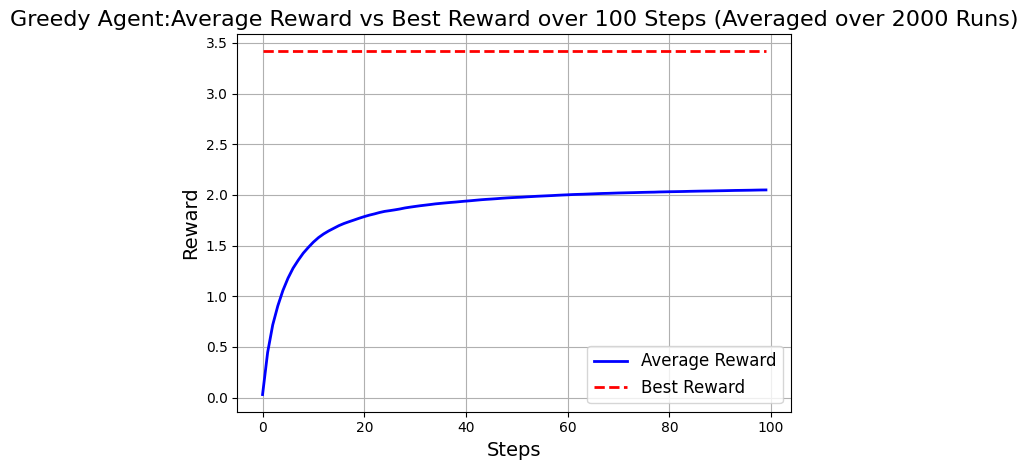

In [ ]:
agent = GreedyAgent(N_BANDITS)
total_averages, total_best_rewards = run(agent,N_BANDITS,NUM_STEPS,NUM_RUNS)

# Vẽ đường trung bình phần thưởng
plt.plot(total_averages, label='Average Reward', color='blue', linewidth=2)
# Vẽ đường phần thưởng tốt nhất
plt.plot(total_best_rewards, label='Best Reward', color='red', linestyle='--', linewidth=2)

# Thêm nhãn cho các trục
plt.xlabel('Steps', fontsize=14)
plt.ylabel('Reward', fontsize=14)

# Thêm tiêu đề cho biểu đồ
plt.title(f'Greedy Agent:Average Reward vs Best Reward over {NUM_STEPS} Steps (Averaged over {NUM_RUNS} Runs)', fontsize=16)

# Thêm chú thích
plt.legend(fontsize=12)

# Thêm lưới cho biểu đồ
plt.grid(True)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

In [ ]:
class EpsilonGreedyAgent:
    def __init__(self,n_bandit,epsilon = 0.1):
      self.n_bandit = n_bandit
      self.epsilon = epsilon  # Xác suất để chọn hành động không tham lam (exploration)
      self.action_value = [0.0] * n_bandit  # Giá trị kỳ vọng của mỗi hành động
      self.action_count = [0] * n_bandit    # Số lần mỗi hành động được chọn

    def get_action(self):
       # Lựa chọn hành động với xác suất epsilon để khám phá
        if np.random.rand() < self.epsilon:
            # Chọn ngẫu nhiên một hành động bất kỳ để khám phá
            return np.random.randint(0, self.n_bandit)
        else:
            # Chọn hành động tham lam (hành động có giá trị lớn nhất)
            return np.argmax(self.action_value)

    def update_value(self,action,reward):
      if self.action_count[action]==0:
        self.action_value[action]=reward
      else:
        self.action_value[action]+=1/self.action_count[action]*(reward-self.action_value[action])

      self.action_count[action]+=1

    def reset(self):
        self.action_value = [0.0] * self.n_bandit
        self.action_count = [0] * self.n_bandit


In [ ]:
if __name__ == "__main__":
    # Khởi tạo
    n_bandit = int(input("Mời nhập số lượng bandit: "))
    print("Bắt đầu với bài toán", n_bandit, ":")


    expectation = [np.random.normal(0, 1) for _ in range(n_bandit)]
    variance = [1]*n_bandit

    env = BanditEnvironment(expectation, variance)
    agent = EpsilonGreedyAgent(n_bandit)


    # Nhập số lần lặp từ bàn phím
    max_iterations = int(input("Mời nhập số lần lặp: "))
    test(env,agent,max_iterations)

Mời nhập số lượng bandit: 10
Bắt đầu với bài toán 10 :
Mời nhập số lần lặp: 14
Lần lặp 1: Tác nhân chọn hành động 0, Phần thưởng: -0.17
Lần lặp 2: Tác nhân chọn hành động 1, Phần thưởng: 1.59
Lần lặp 3: Tác nhân chọn hành động 1, Phần thưởng: 2.81
Lần lặp 4: Tác nhân chọn hành động 1, Phần thưởng: -1.82
Lần lặp 5: Tác nhân chọn hành động 1, Phần thưởng: 1.20
Lần lặp 6: Tác nhân chọn hành động 1, Phần thưởng: 0.05
Lần lặp 7: Tác nhân chọn hành động 1, Phần thưởng: 0.37
Lần lặp 8: Tác nhân chọn hành động 1, Phần thưởng: 1.22
Lần lặp 9: Tác nhân chọn hành động 6, Phần thưởng: -3.08
Lần lặp 10: Tác nhân chọn hành động 1, Phần thưởng: 0.66
Lần lặp 11: Tác nhân chọn hành động 1, Phần thưởng: 0.07
Lần lặp 12: Tác nhân chọn hành động 1, Phần thưởng: -0.51
Lần lặp 13: Tác nhân chọn hành động 1, Phần thưởng: 2.70
Lần lặp 14: Tác nhân chọn hành động 1, Phần thưởng: 2.82


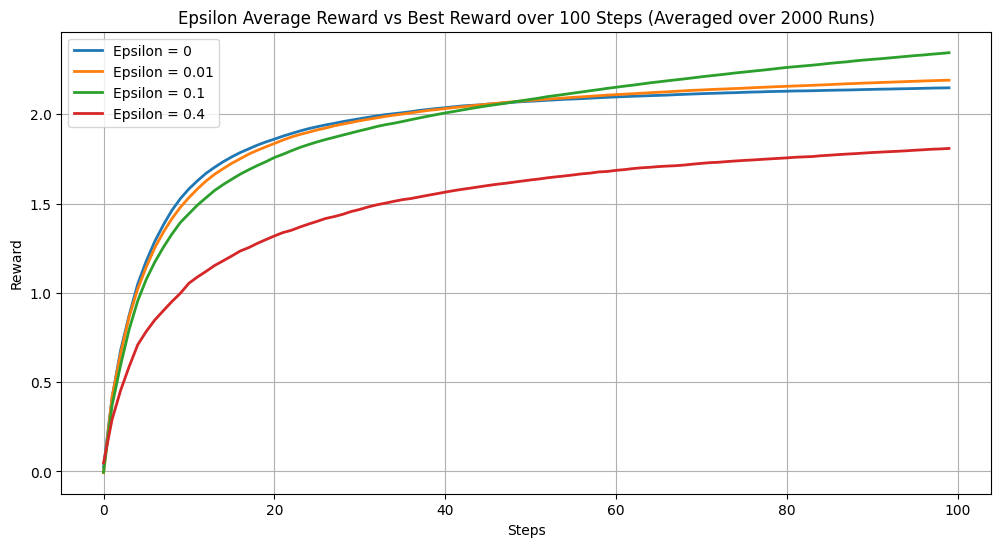

In [ ]:
# Danh sách các giá trị epsilon
epsilons = [0, 0.01, 0.1, 0.4]

# Tạo đối tượng biểu đồ
plt.figure(figsize=(12, 6))

# Danh sách lưu trữ các agent
agents = []

# Tạo agent cho từng giá trị epsilon
for epsilon in epsilons:
    agent = EpsilonGreedyAgent(N_BANDITS, epsilon)
    agents.append(agent)

# Chạy thử nghiệm cho các agent
total_averages = runs(agents, N_BANDITS, NUM_STEPS, NUM_RUNS)

# Vẽ biểu đồ cho từng giá trị epsilon
for i, epsilon in enumerate(epsilons):
    plt.plot(total_averages[i], label=f'Epsilon = {epsilon}', linewidth=2)

# Gán nhãn cho biểu đồ
plt.xlabel('Steps')
plt.ylabel('Reward')
plt.title(f'Epsilon Average Reward vs Best Reward over {NUM_STEPS} Steps (Averaged over {NUM_RUNS} Runs)')

# Hiển thị chú giải và lưới
plt.legend()
plt.grid()

# Hiển thị biểu đồ
plt.show()

# Optimistic Initial Values

•	Phương pháp khởi tạo các giá trị hành động với các ước lượng cao hơn so với giá trị thực tế dự kiến.



In [ ]:
class OTAgent(GreedyAgent):
  def __init__(self,n_bandit,initial_value=1):
    super().__init__(n_bandit)
    self.initial_value=initial_value
    self.action_value=[initial_value]*n_bandit

  def reset(self):
    self.action_value=[self.initial_value]*self.n_bandit

In [ ]:
if __name__ == "__main__":
    # Khởi tạo
    n_bandit = int(input("Mời nhập số lượng bandit: "))
    print("Bắt đầu với bài toán", n_bandit, ":")


    expectation = [np.random.normal(0, 1) for _ in range(n_bandit)]
    variance = [1]*n_bandit

    env = BanditEnvironment(expectation, variance)
    agent = OTAgent(n_bandit)


    # Nhập số lần lặp từ bàn phím
    max_iterations = int(input("Mời nhập số lần lặp: "))
    test(env,agent,max_iterations)

Mời nhập số lượng bandit: 10
Bắt đầu với bài toán 10 :
Mời nhập số lần lặp: 15
Lần lặp 1: Tác nhân chọn hành động 0, Phần thưởng: -1.58
Lần lặp 2: Tác nhân chọn hành động 1, Phần thưởng: -1.02
Lần lặp 3: Tác nhân chọn hành động 2, Phần thưởng: 0.47
Lần lặp 4: Tác nhân chọn hành động 3, Phần thưởng: 1.77
Lần lặp 5: Tác nhân chọn hành động 3, Phần thưởng: 2.27
Lần lặp 6: Tác nhân chọn hành động 3, Phần thưởng: 0.51
Lần lặp 7: Tác nhân chọn hành động 3, Phần thưởng: 1.30
Lần lặp 8: Tác nhân chọn hành động 3, Phần thưởng: 2.98
Lần lặp 9: Tác nhân chọn hành động 3, Phần thưởng: 2.48
Lần lặp 10: Tác nhân chọn hành động 3, Phần thưởng: -1.44
Lần lặp 11: Tác nhân chọn hành động 3, Phần thưởng: 2.89
Lần lặp 12: Tác nhân chọn hành động 3, Phần thưởng: 2.77
Lần lặp 13: Tác nhân chọn hành động 3, Phần thưởng: 3.15
Lần lặp 14: Tác nhân chọn hành động 3, Phần thưởng: 1.73
Lần lặp 15: Tác nhân chọn hành động 3, Phần thưởng: 1.21


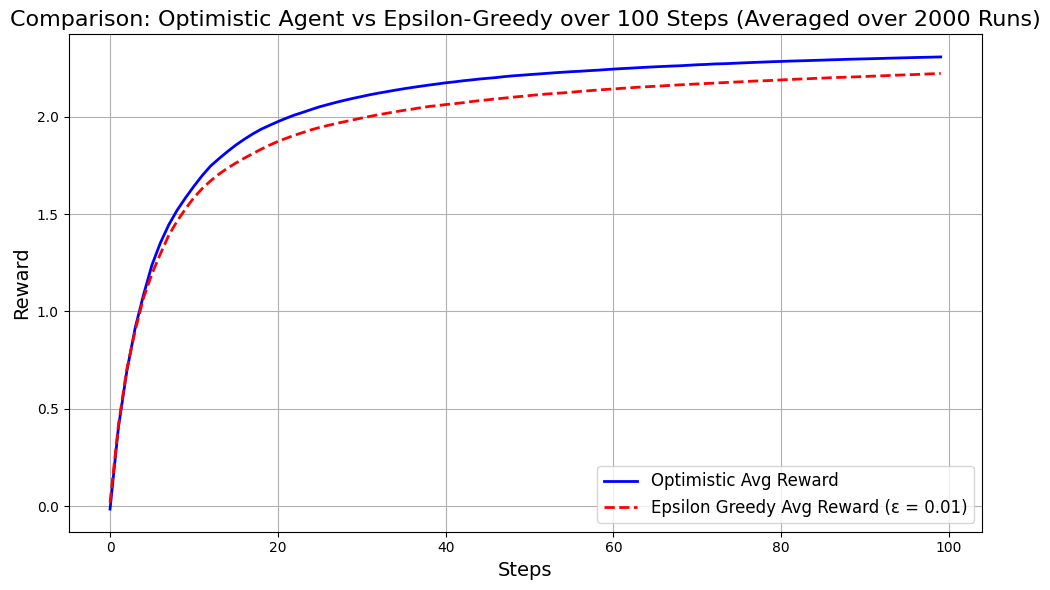

In [ ]:
import matplotlib.pyplot as plt

# Khởi tạo các agent và chạy thử nghiệm
agent = OTAgent(N_BANDITS, 0.5)
epsilon = 0.01
agent_epsilon = EpsilonGreedyAgent(N_BANDITS, epsilon)
total_averages = runs([agent, agent_epsilon], N_BANDITS, NUM_STEPS, NUM_RUNS)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))  # Điều chỉnh kích thước biểu đồ

# Đường trung bình phần thưởng của OTAgent
plt.plot(total_averages[0], label='Optimistic Avg Reward', color='blue', linewidth=2)

# Đường trung bình phần thưởng của EpsilonGreedyAgent
plt.plot(total_averages[1], label=f'Epsilon Greedy Avg Reward (ε = {epsilon})', color='red', linestyle='--', linewidth=2)

# Thêm nhãn cho các trục
plt.xlabel('Steps', fontsize=14)
plt.ylabel('Reward', fontsize=14)

# Thêm tiêu đề cho biểu đồ
plt.title(
    f'Comparison: Optimistic Agent vs Epsilon-Greedy over {NUM_STEPS} Steps '
    f'(Averaged over {NUM_RUNS} Runs)',
    fontsize=16
)

# Thêm chú thích
plt.legend(fontsize=12)

# Thêm lưới cho biểu đồ
plt.grid(True)

# Hiển thị biểu đồ
plt.tight_layout()  # Tự động điều chỉnh bố cục
plt.show()


# Upper-Confidence-Bound Action Selection

o	Phương pháp lựa chọn hành động dựa trên giới hạn tự tin cao, cân nhắc cả giá trị ước lượng và sự không chắc chắn.

•	Công thức:

o	A_t = argmax_a (Q_t(a) + c * sqrt(ln t / N_t(a)))

o	Giải thích:

	ln t: Logarithm tự nhiên của t.

	N_t(a): Số lần hành động a được chọn trước thời điểm t.

	c > 0: Kiểm soát mức độ khám phá.

	Nếu N_t(a) = 0, hành động a được coi là tối ưu(nghĩa là được ưu tiên chọn trước)

In [ ]:
class UCBAgent:
    def __init__(self, n_bandit, c=2):
        self.n_bandit = n_bandit
        self.c = c  # Hệ số điều chỉnh mức độ khám phá
        self.action_value = [0.0] * n_bandit  # Giá trị kỳ vọng của mỗi hành động
        self.action_count = [0] * n_bandit    # Số lần mỗi hành động được chọn
        self.total_count = 0  # Tổng số lần chọn hành động

    def get_action(self):
        # Nếu chưa chọn đủ tất cả các hành động, chọn hành động chưa được chọn
        for i in range(self.n_bandit):
            if self.action_count[i] == 0:
                return i

        # Tính UCB cho mỗi hành động và chọn hành động có giá trị UCB lớn nhất
        ucb_values = [
            self.action_value[i] + self.c * np.sqrt(np.log(self.total_count + 1) / (self.action_count[i] + 1e-5))
            for i in range(self.n_bandit)
        ]
        return np.argmax(ucb_values)

    def update_value(self, action, reward):
        # Cập nhật giá trị kỳ vọng cho hành động dựa trên giá trị nhận được
        self.action_count[action] += 1
        self.total_count += 1

        # Sử dụng công thức cập nhật giá trị trung bình động
        self.action_value[action] += (reward - self.action_value[action]) / self.action_count[action]

    def reset(self):
        self.action_value = [0.0] * self.n_bandit
        self.action_count = [0] * self.n_bandit
        self.total_count = 0

In [ ]:
if __name__ == "__main__":
    # Khởi tạo
    n_bandit = int(input("Mời nhập số lượng bandit: "))
    print("Bắt đầu với bài toán", n_bandit, ":")

    expectation = [np.random.uniform(1, 10) for _ in range(n_bandit)]
    variance = [np.random.uniform(0, 5) for _ in range(n_bandit)]

    env = BanditEnvironment(expectation, variance)
    agent =   UCBAgent(n_bandit)


    # Nhập số lần lặp từ bàn phím
    max_iterations = int(input("Mời nhập số lần lặp: "))
    test(env,agent,max_iterations)

Mời nhập số lượng bandit: 10
Bắt đầu với bài toán 10 :
Mời nhập số lần lặp: 11
Lần lặp 1: Tác nhân chọn hành động 0, Phần thưởng: 7.61
Lần lặp 2: Tác nhân chọn hành động 1, Phần thưởng: 15.11
Lần lặp 3: Tác nhân chọn hành động 2, Phần thưởng: 7.67
Lần lặp 4: Tác nhân chọn hành động 3, Phần thưởng: 9.69
Lần lặp 5: Tác nhân chọn hành động 4, Phần thưởng: 9.38
Lần lặp 6: Tác nhân chọn hành động 5, Phần thưởng: 3.86
Lần lặp 7: Tác nhân chọn hành động 6, Phần thưởng: 1.33
Lần lặp 8: Tác nhân chọn hành động 7, Phần thưởng: 1.87
Lần lặp 9: Tác nhân chọn hành động 8, Phần thưởng: 0.46
Lần lặp 10: Tác nhân chọn hành động 9, Phần thưởng: 7.88
Lần lặp 11: Tác nhân chọn hành động 1, Phần thưởng: 12.00


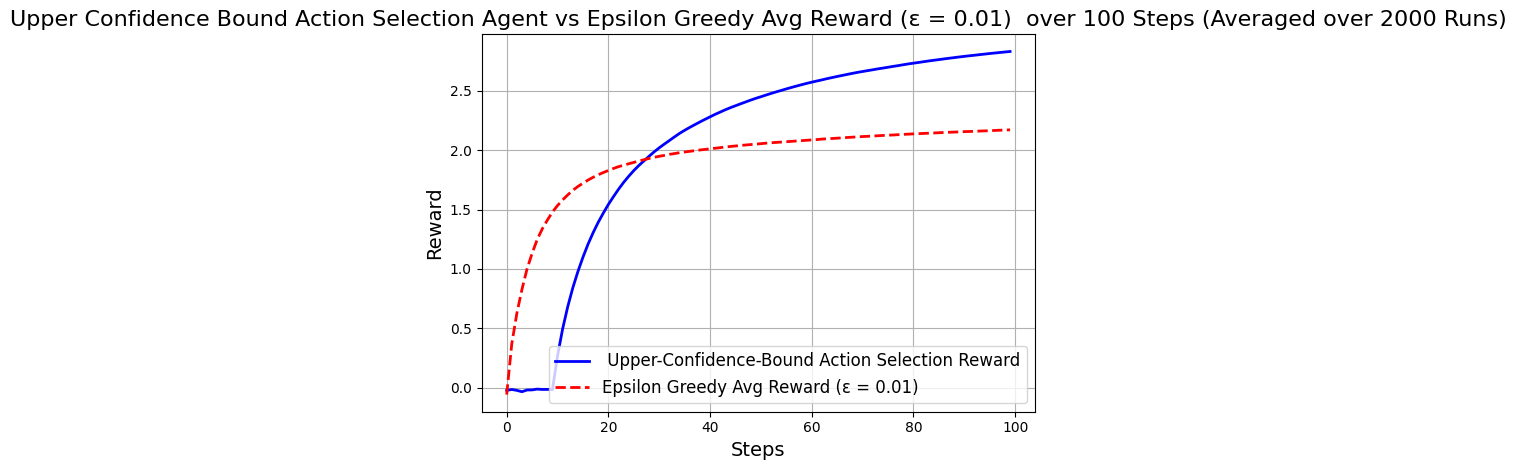

In [ ]:
# Khởi tạo các agent và chạy thử nghiệm
agent = UCBAgent(N_BANDITS)
epsilon = 0.01
agent_epsilon = EpsilonGreedyAgent(N_BANDITS, epsilon)
total_averages = runs([agent, agent_epsilon])

# Vẽ đường trung bình phần thưởng
plt.plot(total_averages[0], label=' Upper-Confidence-Bound Action Selection Reward', color='blue', linewidth=2)
plt.plot(total_averages[1], label=f'Epsilon Greedy Avg Reward (ε = {epsilon})', color='red', linestyle='--', linewidth=2)

# Thêm nhãn cho các trục
plt.xlabel('Steps', fontsize=14)
plt.ylabel('Reward', fontsize=14)

# Thêm tiêu đề cho biểu đồ
plt.title(
    f'Upper Confidence Bound Action Selection Agent vs Epsilon Greedy Avg Reward (ε = {epsilon})  '
    f'over {NUM_STEPS} Steps (Averaged over {NUM_RUNS} Runs)',
    fontsize=16
)

# Thêm chú thích
plt.legend(fontsize=12)

# Thêm lưới cho biểu đồ
plt.grid(True)

# Hiển thị biểu đồ
plt.tight_layout()  # Tự động điều chỉnh bố cục
plt.show()

# **Gradient Bandits**


In [ ]:
class GradientBanditAgent:
    def __init__(self, n_bandit, alpha=0.1):
        self.n_bandit = n_bandit
        self.alpha = alpha  # Tốc độ học
        self.preferences = [0.0] * n_bandit  # Trọng số (preference) của mỗi hành động
        self.action_prob = [1.0 / n_bandit] * n_bandit  # Xác suất chọn hành động
        self.average_reward = 0  # Giá trị kỳ vọng của phần thưởng trung bình
        self.total_count = 0  # Tổng số lần chọn hành động

    def get_action(self):
        # Tính xác suất của mỗi hành động dựa trên hàm Softmax
        exp_preferences = np.exp(self.preferences - np.max(self.preferences))  # Tránh overflow
        self.action_prob = exp_preferences / np.sum(exp_preferences)

        # Chọn hành động dựa trên phân phối xác suất
        return np.random.choice(self.n_bandit, p=self.action_prob)

    def update_value(self, action, reward):
        # Cập nhật phần thưởng trung bình
        self.total_count += 1
        self.average_reward += (reward - self.average_reward) / self.total_count

        # Cập nhật preference của mỗi hành động bằng gradient ascent
        for i in range(self.n_bandit):
            if i == action:
                self.preferences[i] += self.alpha * (reward - self.average_reward) * (1 - self.action_prob[i])
            else:
                self.preferences[i] -= self.alpha * (reward - self.average_reward) * self.action_prob[i]

    def reset(self):
        self.preferences = [0.0] * self.n_bandit
        self.action_prob = [1.0 / self.n_bandit] * self.n_bandit
        self.average_reward = 0
        self.total_count = 0

In [ ]:
if __name__ == "__main__":
    # Khởi tạo
    n_bandit = int(input("Mời nhập số lượng bandit: "))
    print("Bắt đầu với bài toán", n_bandit, ":")

    expectation = [np.random.uniform(1, 10) for _ in range(n_bandit)]
    variance = [np.random.uniform(0, 5) for _ in range(n_bandit)]

    env = BanditEnvironment(expectation, variance)
    agent =   GradientBanditAgent(n_bandit)


    # Nhập số lần lặp từ bàn phím
    max_iterations = int(input("Mời nhập số lần lặp: "))
    test(env,agent,max_iterations)

Mời nhập số lượng bandit: 10
Bắt đầu với bài toán 10 :
Mời nhập số lần lặp: 15
Lần lặp 1: Tác nhân chọn hành động 8, Phần thưởng: 2.74
Lần lặp 2: Tác nhân chọn hành động 6, Phần thưởng: -0.22
Lần lặp 3: Tác nhân chọn hành động 9, Phần thưởng: 1.97
Lần lặp 4: Tác nhân chọn hành động 3, Phần thưởng: 2.64
Lần lặp 5: Tác nhân chọn hành động 8, Phần thưởng: 2.38
Lần lặp 6: Tác nhân chọn hành động 4, Phần thưởng: 3.67
Lần lặp 7: Tác nhân chọn hành động 2, Phần thưởng: 3.95
Lần lặp 8: Tác nhân chọn hành động 7, Phần thưởng: -1.38
Lần lặp 9: Tác nhân chọn hành động 2, Phần thưởng: 4.86
Lần lặp 10: Tác nhân chọn hành động 0, Phần thưởng: -4.34
Lần lặp 11: Tác nhân chọn hành động 7, Phần thưởng: 3.92
Lần lặp 12: Tác nhân chọn hành động 2, Phần thưởng: 19.78
Lần lặp 13: Tác nhân chọn hành động 2, Phần thưởng: 18.51
Lần lặp 14: Tác nhân chọn hành động 2, Phần thưởng: 18.22
Lần lặp 15: Tác nhân chọn hành động 7, Phần thưởng: 4.36


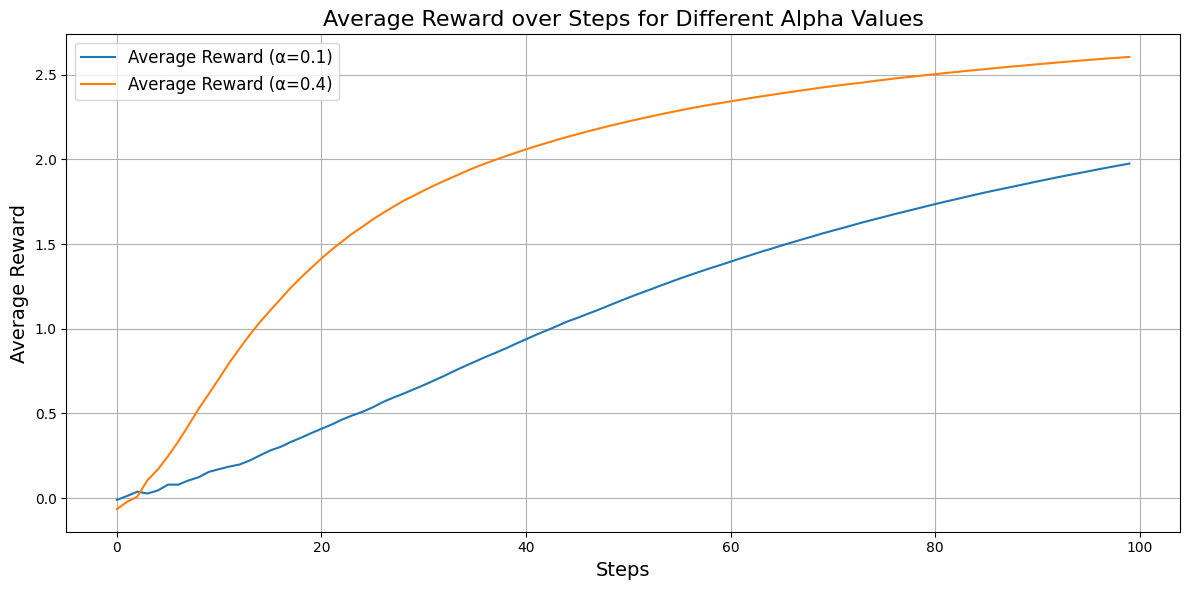

In [ ]:
# Các giá trị alpha khác nhau để thử nghiệm
alpha_values = [0.1, 0.4]  # Hệ số học
agents = []

# Khởi tạo các agent với các giá trị alpha khác nhau
for alpha in alpha_values:
    agent = GradientBanditAgent(N_BANDITS, alpha)
    agents.append(agent)

# Chạy thử nghiệm với hàm runs cho tất cả các agent
total_averages = runs(agents)

# Vẽ biểu đồ Average Reward cho mỗi giá trị alpha
plt.figure(figsize=(12, 6))
for i, alpha in enumerate(alpha_values):
    plt.plot(total_averages[i], label=f'Average Reward (α={alpha})')

# Thêm nhãn cho các trục
plt.xlabel('Steps', fontsize=14)
plt.ylabel('Average Reward', fontsize=14)

# Thêm tiêu đề cho biểu đồ
plt.title('Average Reward over Steps for Different Alpha Values', fontsize=16)

# Thêm chú thích
plt.legend(fontsize=12)

# Thêm lưới cho biểu đồ
plt.grid(True)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()